**Customer Segment analysis**

**Importing libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

**1.Download the data set**

**2.Load the dataset**

In [46]:
data =pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3.Perform Below Virtualisation**

**Univariate analysis**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

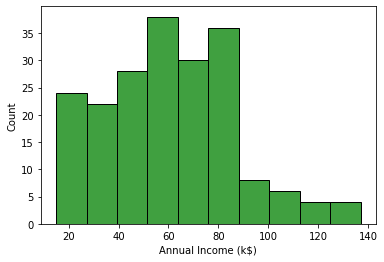

In [47]:
sb.histplot(data['Annual Income (k$)'], color="green")

<AxesSubplot:xlabel='Annual Income (k$)'>

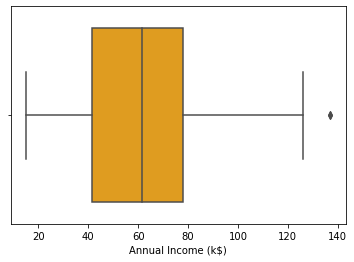

In [48]:
sb.boxplot(data['Annual Income (k$)'], color="orange")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

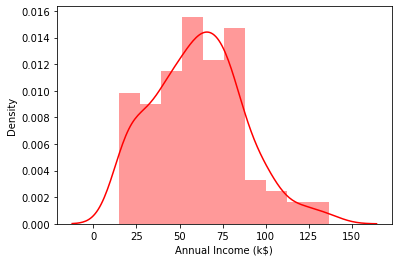

In [49]:
sb.distplot(data['Annual Income (k$)'], color="red")

**Bivariate analysis**

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

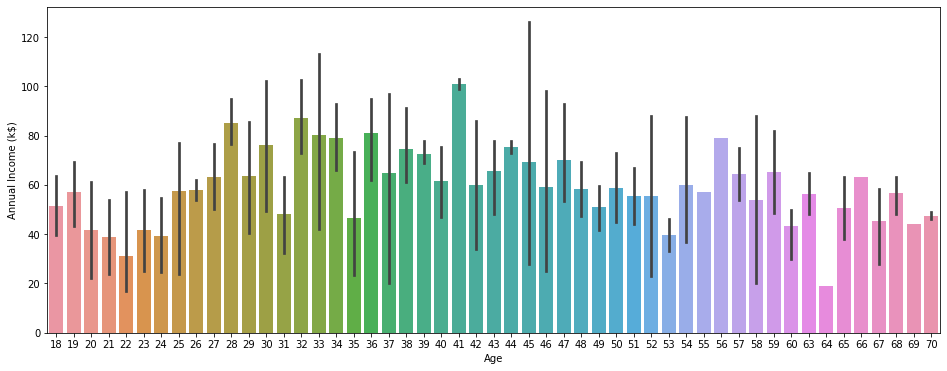

In [50]:
plt.figure(figsize=(16,6))
sb.barplot(data['Age'],data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

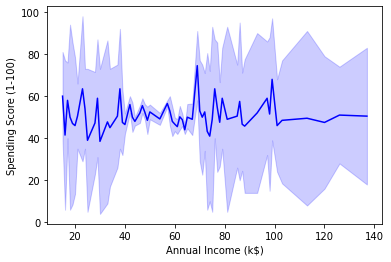

In [51]:
sb.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="blue")

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

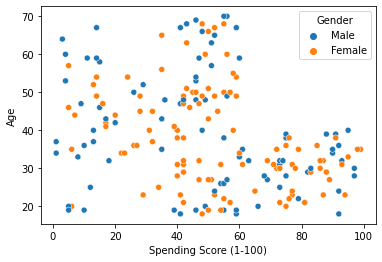

In [52]:
import seaborn as sns
sb.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Gender'])

Gender VS Age

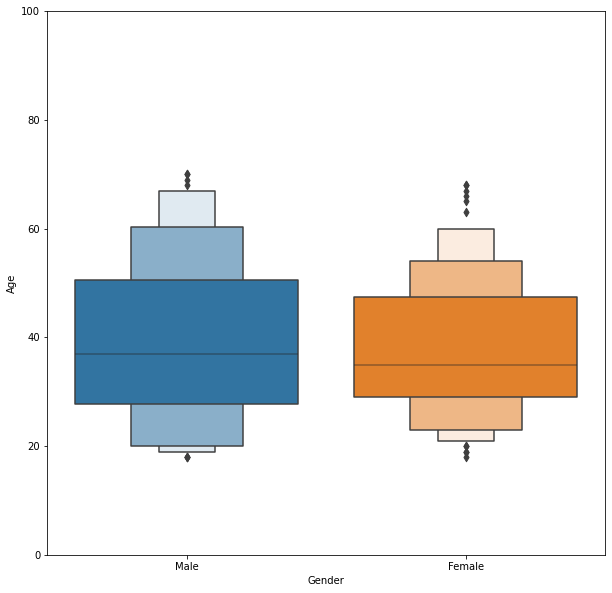

In [53]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sb.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

Annual Income Vs Gender

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

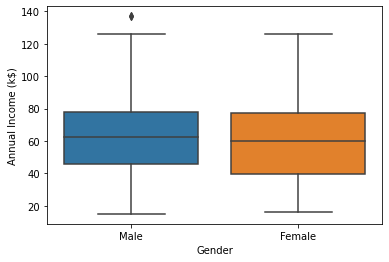

In [54]:
sb.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

**Multivariate Analysis**

Correlation between the different attributes

<AxesSubplot:>

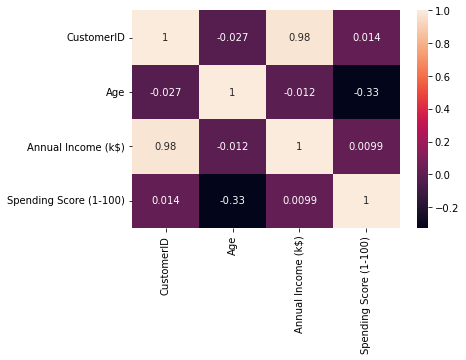

In [55]:
sb.heatmap(data.corr(),annot=True)

**4.Perform Descriptive Stats on the Dataset**

In [56]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [30]:
data.shape

(200, 5)

**5.Check the missing values and deal with them**

In [31]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [32]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**6.Find the outliers and replace them**

In [33]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a76f34e130>,
 'caps': [<matplotlib.lines.Line2D at 0x1a76f34e6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a76f33de20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a76f34ec70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a76f34ef40>],
 'means': []}

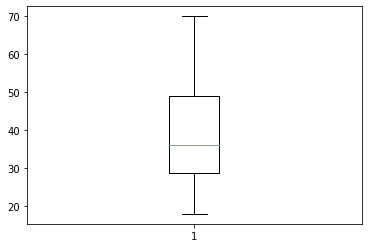

In [34]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a76f3a3d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a76f3b2310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a76f3a3a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a76f3b28b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a76f3b2b80>],
 'means': []}

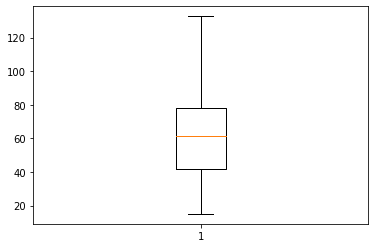

In [35]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a76f40b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a76f40bc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a76f3fe280>],
 'medians': [<matplotlib.lines.Line2D at 0x1a76f418250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a76f418520>],
 'means': []}

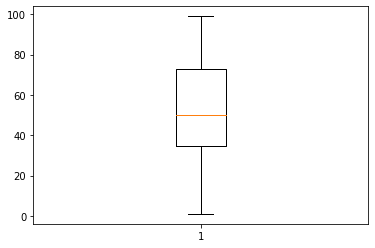

In [36]:
plt.boxplot(data['Spending Score (1-100)'])

**7.Check the Categorial columns and perform encoding**

In [59]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [60]:
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**8.Scaling the data**

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918]])

**9.Perform any of the clustering algorithms**

In [62]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([6, 6, 5, 5, 5, 5, 0, 5, 7, 5, 7, 5, 0, 5, 6, 6, 5, 6, 7, 5, 6, 6,
       0, 6, 0, 6, 0, 6, 0, 5, 7, 5, 7, 6, 0, 5, 0, 5, 0, 5, 0, 6, 7, 5,
       0, 5, 0, 5, 5, 5, 0, 6, 5, 7, 0, 7, 0, 7, 5, 7, 7, 6, 0, 0, 7, 6,
       0, 0, 6, 5, 7, 0, 0, 0, 7, 6, 0, 6, 5, 0, 7, 6, 7, 0, 5, 7, 0, 5,
       5, 0, 0, 6, 7, 0, 5, 6, 0, 5, 7, 6, 5, 0, 7, 6, 7, 5, 0, 7, 7, 7,
       7, 5, 2, 6, 5, 5, 0, 0, 0, 0, 1, 2, 4, 1, 2, 4, 3, 1, 3, 1, 3, 1,
       2, 4, 3, 4, 2, 1, 3, 4, 2, 1, 2, 4, 3, 1, 3, 4, 2, 1, 3, 1, 2, 4,
       2, 4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 2, 1, 3, 1, 3, 1, 2, 4,
       3, 1, 3, 1, 2, 4, 3, 4, 2, 1, 2, 1, 2, 4, 2, 4, 3, 4, 2, 4, 2, 1,
       3, 1])

In [63]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


In [64]:
data1['kclus']  = pd.Series(res)
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,0.000000,1.0,0.019231,0.000000,0.387755,6
1,0.005025,1.0,0.057692,0.000000,0.816327,6
2,0.010050,0.0,0.038462,0.008197,0.051020,5
3,0.015075,0.0,0.096154,0.008197,0.775510,5
4,0.020101,0.0,0.250000,0.016393,0.397959,5


In [65]:
data1['kclus'].unique()

array([6, 5, 0, 7, 2, 1, 4, 3])

In [66]:
data1['kclus'].value_counts()

0    36
5    34
7    25
6    24
4    22
2    20
3    20
1    19
Name: kclus, dtype: int64

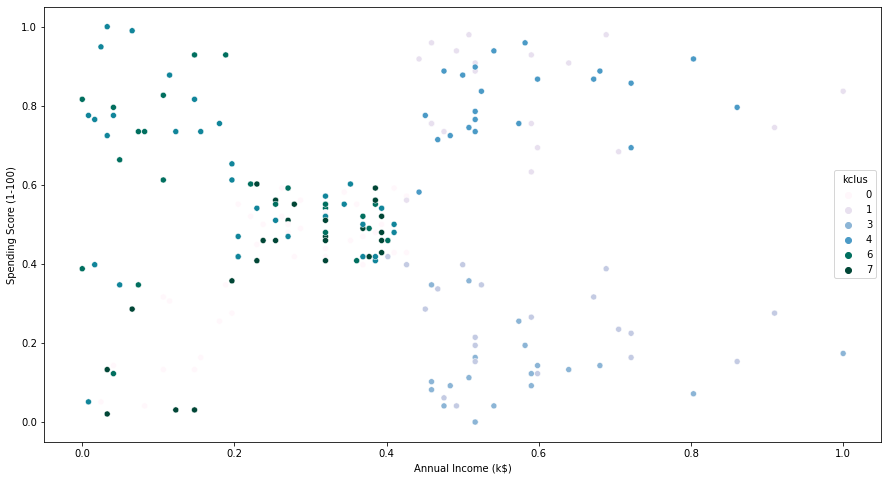

In [67]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [68]:
ind = data1.iloc[:,0:4]
ind.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,0.000000,1.0,0.019231,0.000000
1,0.005025,1.0,0.057692,0.000000
2,0.010050,0.0,0.038462,0.008197
3,0.015075,0.0,0.096154,0.008197
4,0.020101,0.0,0.250000,0.016393


In [69]:
dep = data1.iloc[:,4:]
dep.head()

,Spending Score (1-100),kclus
0,0.387755,6
1,0.816327,6
2,0.051020,5
3,0.775510,5
4,0.397959,5


splitting into train and test data

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,CustomerID,Gender,Age,Annual Income (k$)
116,0.582915,0.0,0.865385,0.409836
67,0.336683,0.0,0.961538,0.270492
78,0.391960,0.0,0.096154,0.319672
42,0.211055,1.0,0.576923,0.196721
17,0.085427,1.0,0.038462,0.049180


In [71]:
x_test.head()

,CustomerID,Gender,Age,Annual Income (k$)
58,0.291457,0.0,0.173077,0.254098
40,0.201005,0.0,0.903846,0.188525
34,0.170854,0.0,0.596154,0.147541
102,0.512563,1.0,0.942308,0.385246
184,0.924623,0.0,0.442308,0.688525


In [72]:
y_train.head()

,Spending Score (1-100),kclus
116,0.428571,0
67,0.479592,0
78,0.520408,5
42,0.357143,7
17,0.663265,6


In [73]:
y_test.head()

,Spending Score (1-100),kclus
58,0.510204,5
40,0.346939,0
34,0.132653,0
102,0.591837,7
184,0.387755,2


In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[0.5829267 , 3.64464439],
       [0.32963404, 2.3593132 ],
       [0.43776917, 3.0218291 ],
       [0.29419419, 3.43414123],
       [0.50235799, 1.409124  ]])

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  2.2329440557764877
The Root mean squared error is:  1.4943038699596838
The Mean absolute error is:  1.0283908856586732
The accuracy is:  0.14247037656344896
